<a href="https://colab.research.google.com/github/hannape/IBAC-Biodiv/blob/master/Kopia_Gridsearch_for_3_representations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gridsearch dla każdej reprezentacji osobno. Bo na IBACu wszystkie 3 reprezentacje były puszczone na architekturę z mel-spectrogramu (chyba?)

Na podstawie hania.dldisc: cnn_gridsearch.ipynb , 03 CNN fit and predict (I2)

In [0]:
from google.colab import drive
drive.mount('/content/drive')
from __future__ import print_function

In [0]:
from __future__ import print_function

import keras
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K
from sklearn.model_selection import GridSearchCV

import numpy
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
#K.set_image_dim_ordering('th')
K.tensorflow_backend.set_image_dim_ordering('th')
import numpy as np
from sklearn import preprocessing
from keras.datasets import mnist
import glob
import os
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from functools import partial, update_wrapper


In [0]:
from numpy.random import seed
seed(667)
from tensorflow import set_random_seed
set_random_seed(667)
import random
random.seed()

'''
#################### Rep 1 - spektro ####################
# rep 1  ------- 63 x 148 ------ TRAIN 17.3k
X_train1 = numpy.load('drive/My Drive/rep IBAC/rep1/X_train_rep1.npy', allow_pickle=True) # 1 and 0 in order
y_train1 = numpy.load('drive/My Drive/rep IBAC/rep1/y_train.npy', allow_pickle=True)
'''
# rep 1V2 ------- 63 x 148 ------ TRAIN 15.9
X_train1 = numpy.load('drive/My Drive/rep IBAC/rep1V2/X_train_rep1.npy', allow_pickle=True) # 1 and 0 in order
y_train1 = numpy.load('drive/My Drive/rep IBAC/rep1V2/y_train_rep1.npy', allow_pickle=True)
'''
# rep 1b ------- 63 x 63 ------
X_train1 = numpy.load('drive/My Drive/rep IBAC/rep1b/X_train_rep1b.npy', allow_pickle=True) # 1 and 0 in order
y_train1 = numpy.load('drive/My Drive/rep IBAC/rep1b/y_train_rep1b.npy', allow_pickle=True)

#################### Rep 3 - mel-spektro ####################

# rep 3 ------- 60 x 111 ------ TRAIN 17.3k
X_train1 = numpy.load('drive/My Drive/rep IBAC/rep3/X_train_rep3.npy', allow_pickle=True) # 1 and 0 in order
y_train1 = numpy.load('drive/My Drive/rep IBAC/rep3/y_train.npy', allow_pickle=True)

# rep 3V2 ------- 60 x 111 ------ TRAIN 15.9
X_train1 = numpy.load('drive/My Drive/rep IBAC/rep3V2/X_train_rep3.npy', allow_pickle=True) # 1 and 0 in order
y_train1 = numpy.load('drive/My Drive/rep IBAC/rep3V2/y_train_rep3.npy', allow_pickle=True)

# rep 3b ------- 60 x 63 ------
X_train1 = numpy.load('drive/My Drive/rep IBAC/rep3b/X_train_rep3b.npy', allow_pickle=True) # 1 and 0 in order
y_train1 = numpy.load('drive/My Drive/rep IBAC/rep3b/y_train_rep3b.npy', allow_pickle=True)

# rep 3V3 ------- 60 x 148 ------
X_train1 = numpy.load('drive/My Drive/rep IBAC/rep3V3/X_train_rep3V3.npy', allow_pickle=True) # 1 and 0 in order
y_train1 = numpy.load('drive/My Drive/rep IBAC/rep3V3/y_train_rep3V3.npy', allow_pickle=True)

#################### Rep 5 - mel-spektro ####################

# rep 5 ------- 64 x 61 ------ TRAIN 17.3k
X_train1 = numpy.load('drive/My Drive/rep IBAC/rep5/X_train_rep5.npy', allow_pickle=True) # 1 and 0 in order
y_train1 = numpy.load('drive/My Drive/rep IBAC/rep5/y_train.npy', allow_pickle=True)

# rep 5V2 ------- 64 x 61 ------ TRAIN 15.9
X_train1 = numpy.load('drive/My Drive/rep IBAC/rep5V2/X_train_rep5.npy', allow_pickle=True) # 1 and 0 in order
y_train1 = numpy.load('drive/My Drive/rep IBAC/rep5V2/y_train_rep5.npy', allow_pickle=True)

# rep 5b ------- 64 x 149 ------
X_train1 = numpy.load('drive/My Drive/rep IBAC/rep5b/X_train_rep5b.npy', allow_pickle=True) # 1 and 0 in order
y_train1 = numpy.load('drive/My Drive/rep IBAC/rep5b/y_train_rep5b.npy', allow_pickle=True)
'''

print('Training set size:')
print(np.shape(X_train1))
print(np.shape(y_train1))


In [0]:
r = np.shape(X_train1)[1]
s = np.shape(X_train1)[2]
y_train = y_train1
X_train = X_train1.reshape(X_train1.shape[0], 1, r, s).astype('float32')
print('Training set size:')
print(np.shape(X_train))
print(np.shape(y_train))
input_shape = (1, r, s)
print(input_shape)

In [0]:
# https://github.com/keras-team/keras/issues/2115

### definiowanie wag 
for_zeros = 0.1
for_ones = 0.9
###

### SCORERS

import tensorflow as tf
import functools
from functools import partial, update_wrapper

def my_score(y_true, y_pred, sample_weight): 
  return log_loss(y_true.values, y_pred, sample_weight=sample_weight.loc[y_true.index.values].values.reshape(-1), normalize=True)

my_scorer = make_scorer(my_score,greater_is_better=False, needs_threshold=False,**score_params)  ## scoring for gridsearchCV

#def binary_crossentropy_weigted(y_true, y_pred, class_weights):
#	y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
#  
#	loss = K.mean(class_weights*(-y_true * K.log(y_pred) - (1.0 - y_true) * K.log(1.0 - y_pred)),axis=-1)
#	return loss

def weighted_binary_crossentropy( y_true, y_pred, weights_10) :
    y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
    logloss = -(y_true * K.log(y_pred) * weights_10[0] + (1 - y_true) * K.log(1 - y_pred) * weights_10[1])
    return K.mean(logloss, axis=-1)

#custom_loss1 = partial(binary_crossentropy_weigted, class_weights=np.array([for_zeros,for_ones])) ## scoring for model.compile
#custom_loss1.__name__ ='binary_crossentropy_weigted'

custom_loss2 = partial(weighted_binary_crossentropy, weights_10=np.array([for_ones,for_zeros])) ## scoring for model.compile
custom_loss2.__name__ ='weighted_binary_crossentropy'

## AUC METRIC
def as_keras_metric(method):
    import functools
    from keras import backend as K
    
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper
  
auc_roc = as_keras_metric(tf.metrics.auc)

In [0]:
def search_model(dense_layer_sizes, filters, kernel_size, pool_size, hidden_layers, loss_function):
   
    #hidden_layers = 1
    model = Sequential()
    model.add(Conv2D(filters, kernel_size,input_shape=input_shape, activation='relu', data_format='channels_first'))
    model.add(MaxPooling2D(pool_size=pool_size))
    #model.add(Conv2D(filters, kernel_size, activation='relu'))
    #model.add(MaxPooling2D(pool_size=pool_size))
    #model.add(Conv2D(filters, kernel_size, activation='relu'))
    #model.add(MaxPooling2D(pool_size=pool_size))
   
    for i in range(0,hidden_layers):
      # Add one hidden layer
      print('Warstwa '+ str(i+1))
      model.add(Conv2D(filters, kernel_size, activation='relu'))
      model.add(MaxPooling2D(pool_size=pool_size))
  
    model.add(Flatten())
    model.add(Dense(dense_layer_sizes, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=loss_function,
                  optimizer='adam',
                  metrics=['accuracy',auc_roc])

    return model

In [0]:
#@title
hidden_layers= 2
for i in range(hidden_layers):
  print(i)

In [0]:
#@title

  
def make_model_modified(dense_layer_sizes, filters, kernel_size, pool_size):
    model = Sequential()
    model.add(Conv2D(filters, kernel_size,input_shape=input_shape, activation='relu', data_format='channels_first')) # "channels_first" corresponds to inputs with shape (batch, channels, height, width)
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Conv2D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Conv2D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
   
    model.add(Flatten())
    model.add(Dense(dense_layer_sizes, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model
  
def probny_model(dense_layer_sizes):
    model = Sequential()
    model.add(Conv2D(10, (3,3),input_shape=input_shape, activation='relu', data_format='channels_first')) # "channels_first" corresponds to inputs with shape (batch, channels, height, width)
    model.add(MaxPooling2D(pool_size=(2,2)))
   
    model.add(Dense(dense_layer_sizes, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model  
  
def make_model(dense_layer_sizes, filters, kernel_size, pool_size):

    model = Sequential()
    model.add(Conv2D(filters, kernel_size,
                     padding='valid',
                     input_shape=input_shape, data_format='channels_first'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters, kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Dropout(0.25))

    model.add(Flatten())
    for layer_size in dense_layer_sizes:
        model.add(Dense(layer_size))
        model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))#(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='binary_crossentropy', #'categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    return model  

In [11]:
y=y_train.astype('int')
print(np.shape(X_train))
print(np.shape(y_train))

(15904, 1, 63, 148)
(15904,)


In [0]:
#@title
my_classifier3 = KerasClassifier(make_model)
validator3 = GridSearchCV(my_classifier3,
                         param_grid={'dense_layer_sizes': [128]}, 
                         scoring='neg_log_loss')



In [0]:
#@title
dense_size_candidates = [[32], [64]] #, [32, 32], [64, 64]]
my_classifier = KerasClassifier(make_model, batch_size=32)

validator = GridSearchCV(my_classifier,
                         param_grid={'dense_layer_sizes': [[32], [64]],
                                     # epochs is avail for tuning even when not
                                     # an argument to model building function
                                     'epochs': [1],
                                     'filters': [8],
                                     'kernel_size': [3],
                                     'pool_size': [2]},
                         scoring='neg_log_loss',
                         n_jobs=1)
#y2=y_train.astype('int')
validator.fit(X_train, y) #_binary)

print('The parameters of the best model are: ')
print(validator.best_params_)

In [13]:
from sklearn.model_selection import StratifiedKFold
my_classifier66 = KerasClassifier(search_model)
validator66 = GridSearchCV(my_classifier66,
                         param_grid={'dense_layer_sizes': [256],
                                     # epochs is avail for tuning even when not
                                     # an argument to model building function
                                     'epochs': [30, 20], #[15, 30, 50],
                                     'filters': [20], #[10, 20],
                                     'kernel_size': [(3,3)], #[(3,3)],
                                     'pool_size': [(2,2)],#[(2,2)],
                                     'hidden_layers': [3],
                                     'loss_function': ['binary_crossentropy'],
                                     'batch_size': [32], #[32, 64]
                                     }, 
                         scoring='roc_auc', #''neg_log_loss', # or not specified
                         cv = StratifiedKFold(n_splits = 5, random_state=667, shuffle = True))
#y=y_train.astype('int')
'''
validator66 = GridSearchCV(my_classifier66,
                         param_grid={'dense_layer_sizes': [128, 256],
                                     # epochs is avail for tuning even when not
                                     # an argument to model building function
                                     'epochs': [10,30], #[10, 30, 50],
                                     'filters': [10,20], #[10, 20],
                                     'kernel_size': [(3,3)], #[(3,3)],
                                     'pool_size': [(2,2)],#[(2,2)],
                                     'hidden_layers': [2,3],
                                     'loss_function': ['binary_crossentropy', custom_loss2],
                                     'batch_size': [32,64], #[32, 64]
                                     }, 
                         scoring='neg_log_loss', cv = StratifiedKFold(n_splits =4, random_state=667, shuffle = True))
'''
grid_result = validator66.fit(X_train, y)
print('The parameters of the best model are: ')
print(validator66.best_params_)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Warstwa 1
Warstwa 2
Warstwa 3
Epoch 1/30
12723/12723 [==============================] - 9s 672us/step - loss: 0.7289 - acc: 0.5450 - auc: 0.4940
Epoch 2/30
12723/12723 [==============================] - 6s 489us/step - loss: 0.6876 - acc: 0.5544 - auc: 0.5064
Epoch 3/30
12723/12723 [==============================] - 6s 492us/step - loss: 0.4890 - acc: 0.7779 - auc: 0.5764
Epoch 4/30
12723/12723 [==============================] - 6s 490us/step - loss: 0.3721 - acc: 0.8478 - auc: 0.6967
Epoch 5/30
12723/12723 [==============================] - 6s 486us/step - loss: 0.3377 - acc: 0.8674 - auc: 0.7626
Epoch 6/30
12723/12723 [==============================] - 6s 488us/step - loss: 0.3154 - acc: 0.8786 - auc: 0.8023
Epoch 7/30
12723/12723 [==============================] - 6s 490us/step - loss: 0.3038 - acc: 0.8822 - auc: 0.8278
Epoch 8/30
12723/12723 [==============================] - 6s 487us/step - loss: 0.2905 - acc: 0.8892 - auc: 0.8462
Epoch 9/30
12723/12723 [==========================

{'batch_size': 32, 'dense_layer_sizes': 256, 'epochs': 20, 'filters': 20, 'hidden_layers': 3, 'kernel_size': (3, 3), 'loss_function': 'binary_crossentropy', 'pool_size': (2, 2)}
20
Warstwa 1
Warstwa 2
Warstwa 3
Epoch 1/20
15904/15904 [==============================] - 13s 808us/step - loss: 0.6960 - acc: 0.5475 - auc: 0.5000
Epoch 2/20
15904/15904 [==============================] - 9s 541us/step - loss: 0.6199 - acc: 0.6395 - auc: 0.5261
Epoch 3/20
15904/15904 [==============================] - 8s 529us/step - loss: 0.3967 - acc: 0.8362 - auc: 0.6658
Epoch 4/20
15904/15904 [==============================] - 8s 531us/step - loss: 0.3305 - acc: 0.8714 - auc: 0.7632
Epoch 5/20
15904/15904 [==============================] - 8s 524us/step - loss: 0.3086 - acc: 0.8791 - auc: 0.8121
Epoch 6/20
15904/15904 [==============================] - 8s 530us/step - loss: 0.2938 - acc: 0.8885 - auc: 0.8406
Epoch 7/20
15904/15904 [==============================] - 8s 527us/step - loss: 0.2816 - acc: 0.89

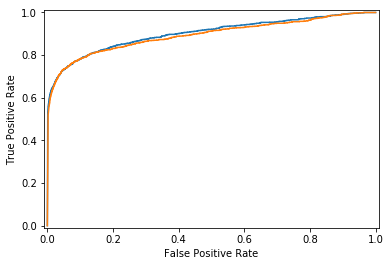

In [46]:
'''
#################### Rep 1 - spektro ####################
# rep 1  ------- 63 x 148 ------ 
'''
X_test1_14 = numpy.load('drive/My Drive/rep1/X_test2_rep1.npy', allow_pickle=True)   
y_test1_14 = numpy.load('drive/My Drive/rep1/y_test2_rep1.npy', allow_pickle=True)
'''
X_test1_6 = numpy.load('drive/My Drive/rep1/X_test_rep1.npy', allow_pickle=True)  
y_test1_6 = numpy.load('drive/My Drive/rep1/y_test_rep1.npy', allow_pickle=True)  ### ----- 322 positive! -----
'''
X_test1_6 = numpy.load('drive/My Drive/rep1/X_test1_rep1_nowa676.npy', allow_pickle=True)  
y_test1_6 = numpy.load('drive/My Drive/rep1/y_test1_rep1_nowa676.npy', allow_pickle=True)  ### ----- 676 positive! -----
'''
# rep 1b ------- 63 x 63 ------
X_test1_14 = numpy.load('drive/My Drive/rep1b/X_test2_rep1b.npy', allow_pickle=True) 
y_test1_14 = numpy.load('drive/My Drive/rep1b/y_test2_rep1b.npy', allow_pickle=True)
X_test1_6 = numpy.load('drive/My Drive/rep1b/X_test1_rep1b.npy', allow_pickle=True)  
y_test1_6 = numpy.load('drive/My Drive/rep1b/y_test1_rep1b.npy', allow_pickle=True)

#################### Rep 3 - mel-spektro ####################

# rep 3 ------- 60 x 111 ------ 
X_test1_14 = numpy.load('drive/My Drive/rep3/X_test2_rep3.npy', allow_pickle=True)  
y_test1_14 = numpy.load('drive/My Drive/rep3/y_test2_popr.npy', allow_pickle=True)
X_test1_6 = numpy.load('drive/My Drive/rep3/X_test_rep3.npy', allow_pickle=True)   
y_test1_6 = numpy.load('drive/My Drive/rep3/y_test.npy', allow_pickle=True)

# rep 3b ------- 60 x 63 ------
X_test1_14 = numpy.load('drive/My Drive/rep3b/X_test2_rep3b.npy', allow_pickle=True)   
y_test1_14 = numpy.load('drive/My Drive/rep3b/y_test2_rep3b.npy', allow_pickle=True)
X_test1_6 = numpy.load('drive/My Drive/rep3b/X_test1_rep3b.npy', allow_pickle=True)   
y_test1_6 = numpy.load('drive/My Drive/rep3b/y_test1_rep3b.npy', allow_pickle=True)

# rep 3V3 ------- 60 x 148 ------
X_test1_14 = numpy.load('drive/My Drive/rep3V3/X_test2_rep3V3.npy', allow_pickle=True)   
y_test1_14 = numpy.load('drive/My Drive/rep3V3/y_test2_rep3V3.npy', allow_pickle=True)
X_test1_6 = numpy.load('drive/My Drive/rep3V3/X_test1_rep3V3.npy', allow_pickle=True)   
y_test1_6 = numpy.load('drive/My Drive/rep3V3/y_test1_rep3V3.npy', allow_pickle=True)

#################### Rep 5 - mel-spektro ####################

# rep 5 ------- 64 x 61 ------ 
X_test1_14 = numpy.load('drive/My Drive/rep5/X_test2_rep5.npy', allow_pickle=True)   
y_test1_14 = numpy.load('drive/My Drive/rep5/y_test2_rep5.npy', allow_pickle=True)
X_test1_6 = numpy.load('drive/My Drive/rep5/X_test_rep5.npy', allow_pickle=True)   
y_test1_6 = numpy.load('drive/My Drive/rep5/y_test_rep5.npy', allow_pickle=True) ### ----- 322 positive! -----

X_test1_6 = numpy.load('drive/My Drive/rep5/X_test1_rep5_nowa676.npy', allow_pickle=True)  
y_test1_6 = numpy.load('drive/My Drive/rep5/y_test1_rep5_nowa676.npy', allow_pickle=True)  ### ----- 676 positive! -----

# rep 5b ------- 64 x 149 ------
X_test1_14 = numpy.load('drive/My Drive/rep5b/X_test2_rep5b.npy', allow_pickle=True)  
y_test1_14 = numpy.load('drive/My Drive/rep5b/y_test2_rep5b.npy', allow_pickle=True)
X_test1_6 = numpy.load('drive/My Drive/rep5b/X_test1_rep5b.npy', allow_pickle=True)   
y_test1_6 = numpy.load('drive/My Drive/rep5b/y_test1_rep5b.npy', allow_pickle=True)
'''

r = np.shape(X_test1_6)[1]
s = np.shape(X_test1_6)[2]

X_test1_14 = X_test1_14.reshape(X_test1_14.shape[0], 1, r, s).astype('float32')
y_test1_14 = np.squeeze(y_test1_14)
X_test1_6 = X_test1_6.reshape(X_test1_6.shape[0], 1, r, s).astype('float32')
y_test1_6 = np.squeeze(y_test1_6)

best1 = validator66.best_params_ #{'batch_size': 32, 'dense_layer_sizes': 256, 'epochs': 30, 'filters': 20, 'hidden_layers': 3, 'kernel_size': (3, 3), 'loss_function': 'binary_crossentropy', 'pool_size': (2, 2)}
means_best = grid_result.cv_results_['mean_test_score']
a = means_best.argsort()[-3:][::-1]
best2 = grid_result.cv_results_['params'][a[1]]
#best3 = grid_result.cv_results_['params'][a[2]]
#means = np.array([0.765971 ,0.898076 ,0.755596,0.752892,0.900277 ,0.754842])
#a = means.argsort()[-3:][::-1]
dict_set = [best1, best2]

print(dict_set[0])
for k in range(0,np.shape(dict_set)[0]):  
  best = dict_set[k]
  dense_layer_sizes= best['dense_layer_sizes']
  filters= best['filters']
  kernel_size= best['kernel_size']
  pool_size= best['pool_size']
  hidden_layers= best['hidden_layers']
  loss_function= best['loss_function']
  batch_size= best['batch_size']
  epochs= best['epochs']
  print(epochs)
  
  chosen_model = search_model(dense_layer_sizes, filters, kernel_size, pool_size, hidden_layers, loss_function)
  model_result = chosen_model.fit(X_train, y, batch_size = batch_size, epochs = epochs)
  
  probs1 = chosen_model.predict_proba(X_test1_14)
  probs2 = chosen_model.predict_proba(X_test1_6)
  probs = np.concatenate([probs1, probs2])
  y_test1 = np.concatenate([y_test1_14, y_test1_6])
  print(np.shape(probs))
  print(np.shape(y_test1))
  auc = roc_auc_score(y_test1, probs)
  print('AUC: %.6f' % auc)
  
  fpr, tpr, thresholds = roc_curve(y_test1, probs)
  plt.plot(fpr, tpr)
  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')





In [0]:
#@title
dense_layer_sizes= best['dense_layer_sizes']
filters= best['filters']
kernel_size= best['kernel_size']
pool_size= best['pool_size']
hidden_layers= best['hidden_layers']
loss_function= best['loss_function']
batch_size= best['batch_size']
epochs= best['epochs']
chosen_model = search_model(dense_layer_sizes, filters, kernel_size, pool_size, hidden_layers, loss_function)
model_result = chosen_model.fit(X_train, y, batch_size = batch_size, epochs = epochs)

X_test1_6 = numpy.load('drive/My Drive/rep IBAC/rep1/X_test1_rep1_nowa676.npy', allow_pickle=True)  
y_test1_6 = numpy.load('drive/My Drive/rep IBAC/rep1/y_test1_rep1_nowa676.npy', allow_pickle=True)  ### ----- 676 positive! -----
X_test1_14 = numpy.load('drive/My Drive/rep IBAC/rep1/X_test2_rep1.npy', allow_pickle=True)   
y_test1_14 = numpy.load('drive/My Drive/rep IBAC/rep1/y_test2_rep1.npy', allow_pickle=True)

r = np.shape(X_test1_6)[1]
s = np.shape(X_test1_6)[2]

X_test1_14 = X_test1_14.reshape(X_test1_14.shape[0], 1, r, s).astype('float32')
y_test1_14 = np.squeeze(y_test1_14)
X_test1_6 = X_test1_6.reshape(X_test1_6.shape[0], 1, r, s).astype('float32')
y_test1_6 = np.squeeze(y_test1_6)

probs1 = chosen_model.predict_proba(X_test1_14)
probs2 = chosen_model.predict_proba(X_test1_6)
probs = np.concatenate([probs1, probs2])
y_test1 = np.concatenate([y_test1_14, y_test1_6])

print(np.shape(probs))
print(np.shape(y_test1))
auc = roc_auc_score(y_test1, probs)
#print("Run: " + str(k))
print('AUC: %.6f' % auc)
fpr, tpr, thresholds = roc_curve(y_test1, probs)
plt.plot(fpr, tpr)
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
#plt.title(title_rys)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [0]:
print('The parameters of the best model are: ')
print(validator66.best_params_)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

The parameters of the best model are: 
{'batch_size': 32, 'dense_layer_sizes': 128, 'epochs': 15, 'filters': 20, 'hidden_layers': 3, 'kernel_size': (3, 3), 'loss_function': 'binary_crossentropy', 'pool_size': (2, 2)}
0.869907 (0.014068) with: {'batch_size': 32, 'dense_layer_sizes': 128, 'epochs': 15, 'filters': 10, 'hidden_layers': 2, 'kernel_size': (3, 3), 'loss_function': 'binary_crossentropy', 'pool_size': (2, 2)}
0.671089 (0.122335) with: {'batch_size': 32, 'dense_layer_sizes': 128, 'epochs': 15, 'filters': 10, 'hidden_layers': 2, 'kernel_size': (3, 3), 'loss_function': functools.partial(<function weighted_binary_crossentropy at 0x7fddec2d7268>, weights_10=array([0.9, 0.1])), 'pool_size': (2, 2)}
0.752012 (0.161275) with: {'batch_size': 32, 'dense_layer_sizes': 128, 'epochs': 15, 'filters': 10, 'hidden_layers': 3, 'kernel_size': (3, 3), 'loss_function': 'binary_crossentropy', 'pool_size': (2, 2)}
0.710827 (0.093366) with: {'batch_size': 32, 'dense_layer_sizes': 128, 'epochs': 15, '